# Final assignment

Name: Jorrit Bootsma, Studentnr: 10251499

In [2153]:
import numpy as np
import scipy.stats as ss
import scipy.optimize as so
import scipy.integrate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import division
from sympy import *

%matplotlib inline
percent = Symbol('%')

def sigmas_to_p(sigval):
    nd = ss.norm(0., 1.)
    return 2.*nd.sf(sigval)

def p_to_sigmas(pval):
    nd = ss.norm(0., 1.)
# We use the 'inverse survival function', the inverse of the sf. We also need to divide
# our p-value by 2 to account for the negative side of the normal distribution.
    return nd.isf(pval/2.)

First the data is extracted from the datafile and it is put in the right format (a 2D array) with each source on a separate row. After that the data is plotted on a log-log scale to make sure a break or cut-off in a power-law will be good visible.

In [2154]:
rawdata = np.genfromtxt ("energies.txt", dtype=np.float, names=["sourcenum", "ener"], skip_header=0, autostrip=True)

data = [ [],[],[],[],[],[],[],[],[],[] ]

for k in range(10):
    for i in range(len(rawdata)):
        if rawdata['sourcenum'][i] == k + 1:
            data[k].append(rawdata['ener'][i])

            
# def dataplots(x, y, length, number, bins):
#     fig, (ax1) = plt.subplots(1,1,figsize=(14,7))
   
#     ax1.plot(x, y)
    
#     ax1.set_title("Source %i" % (number + 1), fontsize=20)
#     ax1.set_yscale('log')
#     ax1.set_xscale('log')
#     ax1.set_ylabel('Counts per bin (logscale)', fontsize=18)
#     ax1.set_xlabel('Energies (keV)', fontsize=18)
#     ax1.tick_params(axis='x', labelsize=16)
#     ax1.tick_params(axis='y', labelsize=16)   
#     ax1.set_xlim([1,20])
#     ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20])
#     ax1.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20])
#     ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
    
#     plt.tight_layout()
#     plt.show()
    
    
def dataplotsnew(x, y, xerr, yerr, number):
    fig, (ax1) = plt.subplots(1,1,figsize=(14,4))

    ax1.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', label='Data')
    ax1.vlines([1.83, 2.4, 6.7], 0, 10000, colors=['red', 'red', 'red'], linestyles='dashed', label = 'Emission energies')
    
    ax1.set_title("Source %i" % (number + 1), fontsize=20)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylabel('Counts per bin (logscale)', fontsize=18)
    ax1.set_xlabel('Energies (keV)', fontsize=18)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)   
    ax1.set_xlim([1,20])
    ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20])
    ax1.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20])
    ax1.get_xaxis().get_major_formatter().labelOnlyBase = False 
    
    plt.tight_layout()
    plt.show()
    

def histrebin(mininbin,counts,edges): # rebins a histogram so there are at least mininbin counts per bin
    edges2=np.zeros(1)
    counts2=np.zeros(1)
    i=0
    countsum=0
    firstbin_flag = 1
    edges2[0]=edges[0]
    for x in counts:
        countsum=countsum+x
        i=i+1
        if countsum >= mininbin and (sum(counts[i:]) >= mininbin or i == len(counts)):  # The sum over counts in 
            # remaining bins ensures that we are not left with a bin with counts less than our limit at the end.
            if firstbin_flag == 1: # if this is the first bin satisfying our requirement, 
                # do not append but replace bin 0 with countsum
                counts2[0]=countsum
                firstbin_flag = 0 # now we read the first bin we can switch this off
            else:
                counts2=np.append(counts2,countsum)
            edges2=np.append(edges2,edges[i])
            countsum=0        

    return counts2, edges2

    
for i in range(10):
    bins = np.ceil(len(data[i])**(1/3))
    counts, edges = np.histogram(data[i], bins=bins, density=False)
    center = (edges[:1]+edges[1:]) / 2
    binwidth = np.diff(edges)
    density = counts / binwidth
    #dataplots(center, density, len(data[i]), i, bins)

source1 = [[],[],[],[]]
source2 = [[],[],[],[]]
source3 = [[],[],[],[]]
source4 = [[],[],[],[]]
source5 = [[],[],[],[]]
source6 = [[],[],[],[]]
source7 = [[],[],[],[]]
source8 = [[],[],[],[]]
source9 = [[],[],[],[]]
source10 = [[],[],[],[]]
    
source3_p = [[],[],[],[],[]]
source4_p = [[],[],[],[],[]]
source9_p = [[],[],[],[],[]]


## Appropriately bin the data 
for i in range(10):
    nbins = 10000
    mincounts = 20  # Here we set it to our minimum requirement of 20, but in principle you could set it higher

    # Number of bins and minimum counts per bin differ per source
    if i==0:
        nbins = 200
    if i==2:
        nbins = np.logspace(0, np.log10(20))
    if i==3:
        nbins = np.logspace(0, np.log10(20))
    if i==4:
        nbins = 1000
    if i==6:
        mincounts = 20
    if i==7:
        nbins = 170
    if i==8:
        nbins = np.logspace(0, np.log10(15))
    if i==9:
        nbins = 800
    
    rmin = min(data[i])
    rmax = max(data[i])
    counts, edges = np.histogram(data[i], bins=nbins, range=[rmin,rmax], density=False)
    bwidths1 = np.diff(edges)
    energies1 = (edges[:-1]+edges[1:])/2
    cdens1 = counts/bwidths1
    elif i == 3: source4_p[0] = energies1; source4_p[1] = (counts); source4_p[2] = np.sqrt((counts)); source4_p[3] = bwidths1/2.; source4_p[4] = edges
    source[4], source[1]  
    plotfunc(source4_p[0], source4_p[1]/(2*source4_p[3]), source4_p[3], source4_p[2], 4, 'Blap', results4_p)
    
    
    
    ### And now we use our new function to rebin so there are at least mincounts counts per bin:
    counts2, edges2 = histrebin(mincounts,counts,edges)

    energies = (edges2[:-1]+edges2[1:])/2.  # This calculates the energy bin centres

    bwidths = np.diff(edges2) # calculates the width of each bin
    cdens = counts2/bwidths # determines the count densities
    cdens_err = np.sqrt(counts2)/bwidths # calculate the errors: remember the error is based on the counts, 
                                            # not the count density, so we have to also apply the same normalisation.
    
    # Create a lists with data for each source separately
    if i == 0: source1[0] = energies; source1[1] = cdens; source1[2] = cdens_err; source1[3] = bwidths/2.
    elif i == 1: source2[0] = energies; source2[1] = cdens; source2[2] = cdens_err; source2[3] = bwidths/2.
    elif i == 2: source3[0] = energies; source3[1] = cdens; source3[2] = cdens_err; source3[3] = bwidths/2.
    elif i == 3: source4[0] = energies; source4[1] = cdens; source4[2] = cdens_err; source4[3] = bwidths/2.
    elif i == 4: source5[0] = energies; source5[1] = cdens; source5[2] = cdens_err; source5[3] = bwidths/2.
    elif i == 5: source6[0] = energies; source6[1] = cdens; source6[2] = cdens_err; source6[3] = bwidths/2.
    elif i == 6: source7[0] = energies; source7[1] = cdens; source7[2] = cdens_err; source7[3] = bwidths/2.
    elif i == 7: source8[0] = energies; source8[1] = cdens; source8[2] = cdens_err; source8[3] = bwidths/2.
    elif i == 8: source9[0] = energies; source9[1] = cdens; source9[2] = cdens_err; source9[3] = bwidths/2.
    elif i == 9: source10[0] = energies; source10[1] = cdens; source10[2] = cdens_err; source10[3] = bwidths/2.
    
    
#   For Poisson method
    if i == 2: source3_p[0] = energies1; source3_p[1] = (counts); source3_p[2] = np.sqrt((counts)); source3_p[3] = bwidths1/2.; source3_p[4] = edges
    elif i == 3: source4_p[0] = energies1; source4_p[1] = (counts); source4_p[2] = np.sqrt((counts)); source4_p[3] = bwidths1/2.; source4_p[4] = edges
    elif i == 8: source9_p[0] = energies1; source9_p[1] = (counts); source9_p[2] = np.sqrt((counts)); source9_p[3] = bwidths1/2.; source9_p[4] = edges
    
    
### UNCOMMENT THE NEXT LINE TO PLOT EVERY DATASET
    #dataplotsnew(energies, cdens, bwidths/2., cdens_err, i)

def LogLikelihood_Pois_Integ(parm, ebins, yval, my_model): # the -ve log-likelihood or an array of bin edges, fitted with 
    # the integral over the bin of the generic model my_fit_model.  Input yval must be counts and not counts per
    # unit x-value
    i = 0
    ymod = np.zeros(len(yval))
    for energy in ebins[:-1]:
        ymod[i], ymoderr = scipy.integrate.quad(lambda x: my_model(x, *parm),ebins[i],ebins[i+1])
        # we don't normalise by bin width since the rate parameter is set by the model and needs to be counts per bin
        i=i+1
        
    pd = ss.poisson(ymod) #we define our Poisson distribution
    return -sum(np.log(pd.pmf(yval)))    
    

#### The used fitting models
Since the used data sets contains the ten brightest sources of our observation, the range of possible X-ray sources is limited. In the next cell, one can find the used fitting models. 

In [2155]:
def ChiSq(parm, my_model, xval, yval, dy): # the weighted least-squares
    ymod = my_model(xval, *parm)
    chisq = sum(pow((yval-ymod)/dy,2))
    return chisq

def my_modelULX_bk(value, N0, Ebk, gamma1, gamma2):
    N = np.empty(len(value))
    i = 0
    while (i < len(value)): 
        if value[i] <= Ebk:
            N[i]= N0 * (value[i])**(-1 * gamma1)
        else:
            N[i] = N0 * (Ebk)**(-1 * gamma1) * ( value[i] / Ebk )**(-1 * gamma2)
        i += 1
    return N

def my_modelULX_bk_em(value, N0, Ebk, gamma1, gamma2, Eline, Nlc):
    E0 = 1
    sigm = 0.06 * np.sqrt(Eline)
    N = np.empty(len(value))
    i = 0
    while (i < len(value)): 
        if value[i] <= Ebk:
            N[i]= N0 * ( value[i] / E0 )**(-1 * gamma1) + add_line(value[i], Eline, Nlc)
        else:
            N[i] = N0 * ( Ebk / E0 )**(-1 * gamma1) * ( value[i] / Ebk )**(-1 * gamma2) + add_line(value[i], Eline, Nlc)
        i += 1
        
    return N

def my_modelULX_cut(value, N0, Ecut, gamma):
    N = N0 * (value)**(-1 * gamma) * np.exp(-1 * value / Ecut)
    return N

def my_modelULX_cut_em(value, N0, Ecut, gamma, Eline, Nlc):
    E0 = 1
    N = N0 * ( value / E0 )**(-1 * gamma) + add_line(value, Eline, Nlc)
    return N

def my_modelSNR(value, N0, gamma):
    N = N0 * value**(-1 * gamma)   
    return N

def my_modelSNR1_em(value, N0, gamma, Eline, Nlc):
    N = N0 * value**(-1 * gamma) + add_line(value, Eline, Nlc)
    return N

def my_modelSNR2_em(value, N0, gamma, Eline, Nlc, Eline2, Nlc2):
    N = N0 * value**(-1 * gamma) + add_line(value, Eline, Nlc) + add_line(value, Eline2, Nlc2)
    return N

def my_modelSNR3_em(value, N0, gamma, Eline, Nlc, Eline2, Nlc2, Eline3, Nlc3):
    N = N0 * value**(-1 * gamma) + add_line(value, Eline, Nlc) + add_line(value, Eline2, Nlc2) + add_line(value, Eline3, Nlc3)
    return N

def my_modelXRB(value, N0, kt):   
    N = N0 * (value)**2 / (np.exp(value / kt) - 1)
    return N

def my_modelXRB_em(value, N0, kt, Eline, Nlc):
    E0 = 1
    N = N0 * (value / E0)**2 / (np.exp(value / kt) - 1) + add_line(value, Eline, Nlc)
    return N

def my_modelCont(value, N0, gamma):
    N = N0 * value**(-1 * gamma)
    return N

def my_modelCont_em(value, N0, gamma, Eline, Nlc):
    N = N0 * value**(-1 * gamma) + add_line(value, Eline, Nlc)
    return N

def my_modelCont2_em(value, N0, gamma, Eline, Nlc, Eline2, Nlc2):
    N = N0 * value**(-1 * gamma) + add_line(value, Eline, Nlc) + add_line(value, Eline2, Nlc2)
    return N

def add_line(value, Eline, Nlc):
    sigm = 0.06 * np.sqrt(Eline)
    Nline = (Nlc / (sigm * np.sqrt(2 * np.pi))) * np.exp(-1 * (value - Eline)**2 / (2 * sigm**2))
    return Nline


# Bounds regarding the different models
ULX_bkbounds = ([-np.inf, 6., 1.6, 2.6],[np.inf, 9., 2., 3.])
ULX_cutbounds = ([-np.inf, 6., 1.6],[np.inf, 9., 3.])
SNRbounds = ([-np.inf,2.3],[np.inf,2.8])
XRBbounds = ([-np.inf, 0.8],[np.inf, 1.4])
Blabounds = ([-np.inf, 2],[np.inf, 2.5])
Seybounds = ([-np.inf, 1.7],[np.inf, 2.2])

# Bounds regarding models including emission lines
ULX_bkbounds_em = ([-np.inf, 6., 1.6, 2.6, -np.inf, -np.inf], [np.inf, 9., 2., 3., np.inf, np.inf])
ULX_cutbounds_em = ([-np.inf, 6., 1.6, -np.inf, -np.inf], [np.inf, 9., 3., np.inf, np.inf])
SNRbounds1_em = ([-np.inf, 2.3, -np.inf, -np.inf], [np.inf, 2.8, np.inf, np.inf])
SNRbounds2_em = ([-np.inf, 2.3, -np.inf, -np.inf, -np.inf, -np.inf], [np.inf, 2.8, np.inf, np.inf, np.inf, np.inf])
SNRbounds3_em = ([-np.inf, 2.3, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf], [np.inf, 2.8, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
XRBbounds_em = ([-np.inf, 0.8, -np.inf, -np.inf], [np.inf, 1.4, np.inf, np.inf])
Blabounds_em = ([-np.inf, 2, -np.inf, -np.inf], [np.inf, 2.5, np.inf, np.inf])
Seybounds_em = ([-np.inf, 1.7, -np.inf, -np.inf], [np.inf, 2, np.inf, np.inf])

# Bounds regarding poisson statistics
ULX_bkbounds_p = [(-np.inf, np.inf),(6., 9.),(1.6, 2),(2.6, 3)]
ULX_cutbounds_p = [(-np.inf, np.inf), (6, 9), (1.6, 3)]
SNRbounds_p = [(-np.inf, np.inf), (2.3, 2.8)]
XRBbounds_p = [(-np.inf, np.inf), (0.8, 1.4)]
Blabounds_p = [(-np.inf, np.inf), (2, 2.5)]
Seybounds_p = [(-np.inf, np.inf), (1.7, 2.2)]


Below, continuum fits are performed using the binned data with 20 or more counts per bin (so that the errors are normally distributed and a least-square method can be used). Firstly, all the models are fitted to all the sources using the run_models() function. After looking at the results (chi-squared/d.o.f. and goodness-of-fit, uncomment if you would like to check these) a (broad) choice is made regarding which fits should be plotted. Those plots are shown below.

In [2156]:
def run_models(my_model, p0, bounds, source, sourcenum, model):

    if model[-1] == 'p':
        mini = so.minimize(LogLikelihood_Pois_Integ, p0, args=(source[4], source[1], my_model), method='L-BFGS-B', bounds=bounds)
        covar = np.sqrt(np.diag(1. / np.linalg.inv(mini.hess_inv.todense())))
        
        ml_cfpars = mini.x
        loglikelihood = mini.fun
        err = covar
        
    else:
        ml_cfpars, ml_cfcovar = so.curve_fit(my_model, source[0], source[1], p0, sigma=source[2], bounds=bounds)
        err = np.sqrt(np.diag(ml_cfcovar))
    
        minChisq = ChiSq(ml_cfpars,my_model,source[0],source[1],source[2])
        dof = len(source[0])-len(p0)
        GOF = ss.chi2.sf(minChisq,df=(len(source[0])-len(p0)))
    
    print "\nSource %i" % sourcenum

    if model == 'ULX_bk':
        print "Model = %s" % model
        print "N0 = " + str(ml_cfpars[0]) + " +/- " + str(err[0])
        print "E_break = " + str(ml_cfpars[1]) + " +/- " + str(err[1])
        print "gamma1 = " + str(ml_cfpars[2]) + " +/- " + str(err[2])
        print "gamma2 = " + str(ml_cfpars[3]) + " +/- " + str(err[3])
        print "Minimum Chi-squared = " + str(minChisq) + " for " + str(dof) + " d.o.f."
        print "The goodness of fit is: %.4g" % GOF

    if model == 'ULX_cut':
        print "Model = %s" % model
        print "N0 = " + str(ml_cfpars[0]) + " +/- " + str(err[0])
        print "E_cutoff = " + str(ml_cfpars[1]) + " +/- " + str(err[1])
        print "gamma1 = " + str(ml_cfpars[2]) + " +/- " + str(err[2])
        print "Minimum Chi-squared = " + str(minChisq) + " for " + str(dof) + " d.o.f."
        print "The goodness of fit is: %.4g" % GOF
        
    if model == 'SNR':
        print "Model = %s" % model
        print "N0 = " + str(ml_cfpars[0]) + " +/- " + str(err[0])
        print "gamma = " + str(ml_cfpars[1]) + " +/- " + str(err[1])
        print "Minimum Chi-squared = " + str(minChisq) + " for " + str(dof) + " d.o.f."
        print "The goodness of fit is: %.4g" % GOF
        
    if model == 'XRB':
        print "Model = %s" % model
        print "N0 = " + str(ml_cfpars[0]) + " +/- " + str(err[0])
        print "k_b * T = " + str(ml_cfpars[1]) + " +/- " + str(err[1])
        print "Minimum Chi-squared = " + str(minChisq) + " for " + str(dof) + " d.o.f."
        print "The goodness of fit is: %.4g" % GOF
        
    if model == 'Bla':
        print "Model = %s" % model
        print "N0 = " + str(ml_cfpars[0]) + " +/- " + str(err[0])
        print "gamma = %.4f +/- %.4f" % (ml_cfpars[1], err[1])
        print "Minimum Chi-squared = " + str(minChisq) + " for " + str(dof) + " d.o.f."
        print "The goodness of fit is: %.4g" % GOF
        
    if model == 'Sey':
        print "Model = %s" % model
        print "N0 = " + str(ml_cfpars[0]) + " +/- " + str(err[0])
        print "gamma = %.4f +/- %.4f" % (ml_cfpars[1], err[1])  
        print "Minimum Chi-squared = " + str(minChisq) + " for " + str(dof) + " d.o.f."
        print "The goodness of fit is: %.4g" % GOF        

    if model[-1] == 'p':
        print "Model = %s" % model
        print "Parameters = ", ml_cfpars
        print "Errors are: ", err
        print "Maximum log-likelihood: %.4f" % (-1 * loglikelihood)
        return ml_cfpars, err, loglikelihood
        
    else:    
        return ml_cfpars, err, minChisq, dof, GOF


def ini_models(source, sourcenum):
    results = [[],[],[],[],[],[],[],[],[],[]]
    results[0] = run_models(my_modelULX_bk, [1, 7, 1.8, 2.8], ULX_bkbounds, source, sourcenum, 'ULX_bk')
    results[1] = run_models(my_modelULX_cut, [1, 7, 1.8], ULX_cutbounds, source, sourcenum, 'ULX_cut')
    results[2] = run_models(my_modelSNR, [1, 2.5], SNRbounds, source, sourcenum, 'SNR')
    results[3] = run_models(my_modelXRB, [1, 1], XRBbounds, source, sourcenum, 'XRB')
    results[4] = run_models(my_modelCont, [1, 2.2], Blabounds, source, sourcenum, 'Bla')
    results[5] = run_models(my_modelCont, [1, 1.9], Seybounds, source, sourcenum, 'Sey')    
    return results

def ini_models_p(source, sourcenum):
    results = [[],[],[],[],[],[],[],[],[],[]]
    results[1] = run_models(my_modelULX_cut, [1, 7, 1.8], ULX_cutbounds_p, source, sourcenum, 'ULX_cutp')
    results[2] = run_models(my_modelSNR, [1, 2.5], SNRbounds_p, source, sourcenum, 'SNRp')
    results[3] = run_models(my_modelXRB, [1, 1], XRBbounds_p, source, sourcenum, 'XRBp')
    results[4] = run_models(my_modelCont, [1, 2.2], Blabounds_p, source, sourcenum, 'Blap')
    results[5] = run_models(my_modelCont, [1, 1.9], Seybounds_p, source, sourcenum, 'Seyp')    
    return results

plotfunc(source4_p[0], source4_p[1]/(2*source4_p[3]), source4_p[3], source4_p[2], 4, 'Blap', results4_p)

def plotfunc(x, y, xerr, yerr, sourcenum, model, params):

    xmodel = np.arange(0, 20, 0.1)
    thing = ''
    # Determine which model has to be used and calculate fit
        # First the models including emission lines
    if model[-2:] == 'em':
        model = model[:-3]
        thing = 'em'
        
        if model == 'ULX_bk': 
            num=0
            ymod = my_modelULX_bk_em(x, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5])
            ymodel = my_modelULX_bk_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5])
        
        elif model == 'ULX_cut': 
            num=1
            ymod = my_modelULX_cut_em(x, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4])
            ymodel = my_modelULX_cut_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4])

        elif model == 'SNR1': 
            num=2 
            ymod = my_modelSNR1_em(x, params[0][0], params[0][1], params[0][2], params[0][3])
            ymodel = my_modelSNR1_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3])

        elif model == 'SNR2': 
            num=2 
            ymod = my_modelSNR2_em(x, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5])
            ymodel = my_modelSNR2_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5])
            
        elif model == 'SNR3': 
            num=2 
            ymod = my_modelSNR3_em(x, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5], params[0][6], params[0][7])
            ymodel = my_modelSNR3_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5], params[0][6], params[0][7])
            
        elif model == 'XRB': 
            num=3
            ymod = my_modelXRB_em(x, params[0][0], params[0][1], params[0][2], params[0][3])
            ymodel = my_modelXRB_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3])

        elif model == 'Sey': 
            num=4
            ymod = my_modelCont_em(x, params[0][0], params[0][1], params[0][2], params[0][3])
            ymodel = my_modelCont_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3])
        
        elif model == 'Sey2': 
            num=4
            ymod = my_modelCont2_em(x, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5])
            ymodel = my_modelCont2_em(xmodel, params[0][0], params[0][1], params[0][2], params[0][3], params[0][4], params[0][5])
            
        # Second the models without emission lines
    else:
        if model[-1] == 'p':
            thing = 'p'
            model = model[:-1]
        
        if model == 'ULX_bk': 
            num=0
            ymod = my_modelULX_bk(x, params[num][0][0], params[num][0][1], params[num][0][2], params[num][0][3])
            ymodel = my_modelULX_bk(xmodel, params[num][0][0], params[num][0][1], params[num][0][2], params[num][0][3])

        elif model == 'ULX_cut': 
            num=1
            ymod = my_modelULX_cut(x, params[num][0][0], params[num][0][1], params[num][0][2])
            ymodel = my_modelULX_cut(xmodel, params[num][0][0], params[num][0][1], params[num][0][2])

        elif model == 'SNR': 
            num=2 
            ymod = my_modelSNR(x, params[num][0][0], params[num][0][1])
            ymodel = my_modelSNR(xmodel, params[num][0][0], params[num][0][1])

        elif model == 'XRB': 
            num=3
            ymod = my_modelXRB(x, params[num][0][0], params[num][0][1])
            ymodel = my_modelXRB(xmodel, params[num][0][0], params[num][0][1])

        elif model == 'Bla': 
            num=4
            ymod = my_modelCont(x, params[num][0][0], params[num][0][1])
            ymodel = my_modelCont(xmodel, params[num][0][0], params[num][0][1])

        elif model == 'Bla_edit':
            thing = 'edit'
            num=4
            ymod = my_modelCont(x, params[0][0], params[0][1])
            ymodel = my_modelCont(xmodel, params[0][0], params[0][1])
            
        elif model == 'Sey': 
            num=5
            ymod = my_modelCont(x, params[num][0][0], params[num][0][1])
            ymodel = my_modelCont(xmodel, params[num][0][0], params[num][0][1])
    
    # Initialize figure
    fig1, (ax1, ax3) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

    # Draw plots
    ax1.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', label='Data')
    ax1.plot(xmodel, ymodel, label='Model %s' % model)
    ax1.vlines([1.83, 2.4, 6.7], 0, 10000, colors=['#006d2c', '#006d2c', '#006d2c'], linestyles='dotted', label = 'Emission energies')

    ax3.errorbar(x, (y - ymod) / ymod, xerr=xerr, yerr=yerr/ymod, fmt='o', label='Residuals (ratio)')
    ax3.axhline(y = 0, linestyle='dashed', color='red', lw=1, label="No difference (y = 0)")
    ax3.vlines([1.83, 2.4, 6.7], -1, 2.5, colors=['#006d2c', '#006d2c', '#006d2c'], lw=1, linestyles='dotted', label = 'Emission energies')

    
    # Plot lay-out
    if thing == 'em':
        ax1.set_title("Source %i, model %s\nChisq of %.2f, with dof = %i; GOF: %.4f" % (sourcenum, model+thing, params[2], params[3], params[4]), fontsize=20)
    elif thing == 'edit':
        ax1.set_title("Source %i, model %s\nChisq of %.2f, with dof = %i; GOF: %.4f" % (sourcenum, model, params[2], params[3], params[4]), fontsize=20)
    elif thing == 'p':
        ax1.set_title("Source %i, model %s\n" % (sourcenum, model), fontsize=20)        
    else:
        ax1.set_title("Source %i, model %s\nChisq of %.2f, with dof = %i; GOF: %.4f" % (sourcenum, model, params[num][2], params[num][3], params[num][4]), fontsize=20)
    
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylabel('Density per bin (logscale)', fontsize=18)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)   
    ax1.set_xlim([1,20])
    ax1.set_ylim([min(y) - min(y)/10, max(y) + max(y)/4])
    if thing == 'p':
        ax1.set_ylim([10**-1, 10**3])
    leg1 = ax1.legend(fontsize=16, frameon=True)
    leg1.get_frame().set_edgecolor('b')

    ax3.set_title("\nRatio between model and data", fontsize=20)
    ax3.set_xlabel("Energies (keV)", fontsize=18)
    ax3.set_ylabel("Residuals (data / model)", fontsize=18)
    ax3.set_xscale('log')
    ax3.tick_params(axis='x', labelsize=16)
    ax3.tick_params(axis='y', labelsize=16)
    ax3.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20])
    ax3.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20])
    ax3.get_xaxis().get_major_formatter().labelOnlyBase = False
    leg3 = ax3.legend(fontsize=16, frameon=True, loc=1, ncol=3, mode="expand")   
    leg3.get_frame().set_edgecolor('b')
    
    plt.tight_layout()
    plt.show()
    
# Try every model on every source
results1 = ini_models(source1, 1)
results2 = ini_models(source2, 2)
results3 = ini_models(source3, 3)
results4 = ini_models(source4, 4)
results5 = ini_models(source5, 5)
results6 = ini_models(source6, 6)
results7 = ini_models(source7, 7)
results8 = ini_models(source8, 8)
results9 = ini_models(source9, 9)
results10 = ini_models(source10, 10)

results3_p = ini_models_p(source3_p, 3)
results4_p = ini_models_p(source4_p, 4)
results9_p = ini_models_p(source9_p, 9)

# # Plot the best-fitting models
# plotfunc(source1[0], source1[1], source1[3], source1[2], 1, 'ULX_cut', results1)

# plotfunc(source2[0], source2[1], source2[3], source2[2], 2, 'ULX_bk', results2)
# plotfunc(source2[0], source2[1], source2[3], source2[2], 2, 'ULX_cut', results2)

# plotfunc(source3[0], source3[1], source3[3], source3[2], 3, 'ULX_cut', results3)
# plotfunc(source3[0], source3[1], source3[3], source3[2], 3, 'SNR', results3)
# plotfunc(source3[0], source3[1], source3[3], source3[2], 3, 'Bla', results3)
# plotfunc(source3[0], source3[1], source3[3], source3[2], 3, 'Sey', results3)

# plotfunc(source4[0], source4[1], source4[3], source4[2], 4, 'ULX_bk', results4)
# plotfunc(source4[0], source4[1], source4[3], source4[2], 4, 'ULX_cut', results4)
# plotfunc(source4[0], source4[1], source4[3], source4[2], 4, 'SNR', results4)
# plotfunc(source4[0], source4[1], source4[3], source4[2], 4, 'Bla', results4)
# plotfunc(source4[0], source4[1], source4[3], source4[2], 4, 'Sey', results4)

# plotfunc(source5[0], source5[1], source5[3], source5[2], 5, 'ULX_bk', results5)
# plotfunc(source5[0], source5[1], source5[3], source5[2], 5, 'Bla', results5)
# plotfunc(source5[0], source5[1], source5[3], source5[2], 5, 'Sey', results5)

# plotfunc(source6[0], source6[1], source6[3], source6[2], 6, 'SNR', results6)

# plotfunc(source7[0], source7[1], source7[3], source7[2], 7, 'ULX_bk', results7)
# plotfunc(source7[0], source7[1], source7[3], source7[2], 7, 'Bla', results7)
# plotfunc(source7[0], source7[1], source7[3], source7[2], 7, 'Sey', results7)

# plotfunc(source8[0], source8[1], source8[3], source8[2], 8, 'Bla', results8)
# plotfunc(source8[0], source8[1], source8[3], source8[2], 8, 'Sey', results8)

# plotfunc(source9[0], source9[1], source9[3], source9[2], 9, 'XRB', results9)

# plotfunc(source10[0], source10[1], source10[3], source10[2], 10, 'ULX_bk', results10)
# plotfunc(source10[0], source10[1], source10[3], source10[2], 10, 'Bla', results10)
# plotfunc(source10[0], source10[1], source10[3], source10[2], 10, 'Sey', results10)


# plotfunc(source3_p[0], source3_p[1] / (source3_p[3] * 2), source3_p[3], source3_p[2], 3, 'Blap', results3_p)

# plotfunc(source4_p[0], source4_p[1] / (source4_p[3] * 2), source4_p[3], source4_p[2], 4, 'SNRp', results4_p)
# plotfunc(source4_p[0], source4_p[1] / (source4_p[3] * 2), source4_p[3], source4_p[2], 4, 'Blap', results4_p)

# plotfunc(source9_p[0], source9_p[1] / (source9_p[3] * 2), source9_p[3], source9_p[2], 9, 'XRBp', results9_p)



Source 1
Model = ULX_bk
N0 = 10973.3828065 +/- 296.592961682
E_break = 6.0 +/- 0.507130808576
gamma1 = 2.0 +/- 0.0325054346731
gamma2 = 3.0 +/- 0.148301036627
Minimum Chi-squared = 175.807772187 for 76 d.o.f.
The goodness of fit is: 6.996e-10

Source 1
Model = ULX_cut
N0 = 13111.999342 +/- 215.046238961
E_cutoff = 7.27808135422 +/- 0.652212313841
gamma1 = 1.77690432325 +/- 0.0447717438682
Minimum Chi-squared = 83.1586301119 for 77 d.o.f.
The goodness of fit is: 0.2956

Source 1
Model = SNR
N0 = 13208.8514049 +/- 361.361013192
gamma = 2.31130233692 +/- 0.0278232875338
Minimum Chi-squared = 281.558001131 for 78 d.o.f.
The goodness of fit is: 8.346e-25

Source 1
Model = XRB
N0 = 8205.14057725 +/- 1477.48437534
k_b * T = 0.8 +/- 0.0372874501065
Minimum Chi-squared = 2164.77982684 for 78 d.o.f.
The goodness of fit is: 0

Source 1
Model = Bla
N0 = 13208.8711205 +/- 361.361403022
gamma = 2.3113 +/- 0.0278
Minimum Chi-squared = 281.558001129 for 78 d.o.f.
The goodness of fit is: 8.346e-25

So

### Source 1.

This source is (based on the results, regarding source 1, shown above (namely the plotted data and the GOF's) fitted with an ULX_cut model with the appropriate bounds. No pattern can be extracted from the residuals and therefor this source is found to an ULX source

Model = ULX_cut
N0 = 13111.9993 +/- 215.0462
Ecut/bk = 7.2781 +/- 0.6522
gamma1 = 1.7769 +/- 0.0448
Chi-squared = 83.16, with 77 dof
GOF = 0.2956


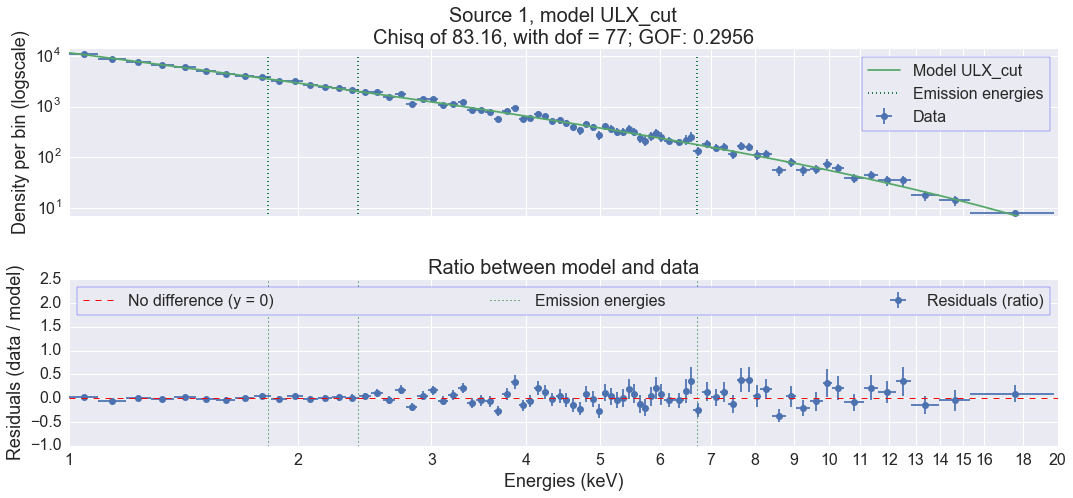

In [2180]:
models = ['ULX_bk', 'ULX_cut', 'SNR', 'XRB', 'Bla', 'Sey']
parameters = ['N0', 'Ecut/bk', 'gamma1', 'Eline', 'Nlc', 'Eline2', 'Nlc2', 'Eline3', 'Nlc3']

## Current values:
print 'Model = %s' % models[1]
for i in range(len(results1[1][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results1[1][0][i], results1[1][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results1[1][2], results1[1][3])
print 'GOF = %.4f' % (results1[1][4])

plotfunc(source1[0], source1[1], source1[3], source1[2], 1, 'ULX_cut', results1)

### Source 2.

This source is (based on the results, regarding source 2, shown above) fitted with an ULX_bk model with the appropriate bounds. An absorption line appeared to be present at ~10 keV and a line_flux > 0 around this energy could be true, but no significant evidence is found.

Model = ULX_bk
N0 = 9860.7947 +/- 182.9656
Ecut/bk = 8.4327 +/- 0.6854
gamma1 = 1.9221 +/- 0.0200
gamma2 = 2.9434 +/- 0.1981
Chi-squared = 347.25, with 297 dof
GOF = 0.0237


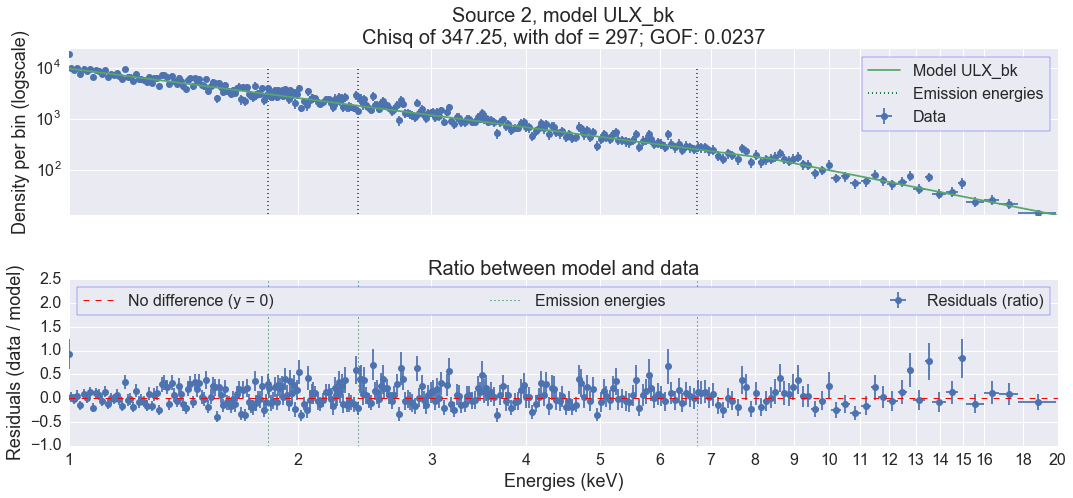


Source 2
Model = ULX_bk_em
N0 = 9846.2319 +/- 181.4506
Ecut/bk = 8.6153 +/- 0.7301
gamma1 = 1.9196 +/- 0.0197
gamma2 = 2.9400 +/- 0.2028
Eline = 10.8911 +/- 0.1635
Nlc = -14.3445 +/- 7.1861
Chi-squared = 341.91, with 295 dof
GOF = 0.03113


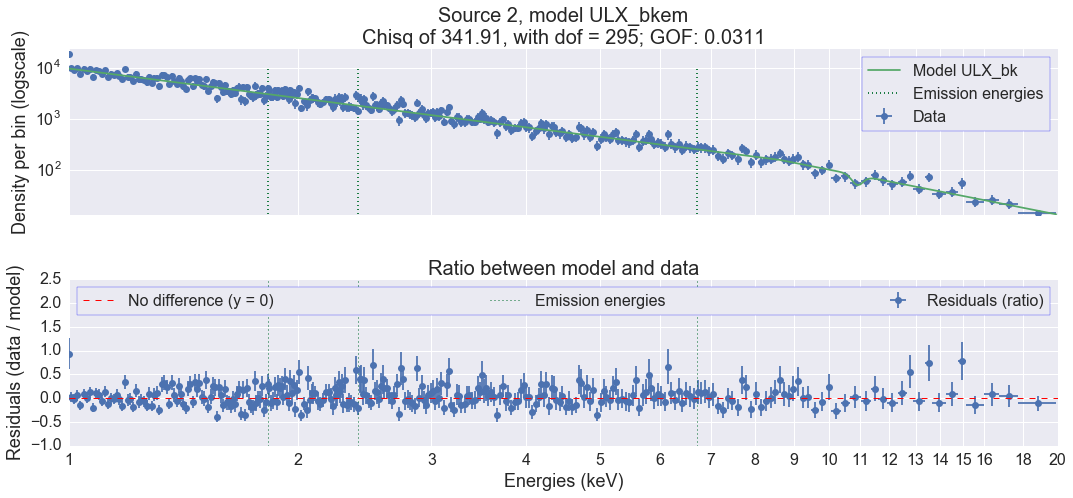

In [2158]:
models = ['ULX_bk', 'ULX_cut', 'SNR', 'XRB', 'Bla', 'Sey']
parameters = ['N0', 'Ecut/bk', 'gamma1', 'gamma2', 'Eline', 'Nlc', 'Eline2', 'Nlc2', 'Eline3', 'Nlc3']

## Current values:
print 'Model = %s' % models[0]
for i in range(len(results2[0][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results2[0][0][i], results2[0][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results2[0][2], results2[0][3])
print 'GOF = %.4f' % (results2[0][4])

plotfunc(source2[0], source2[1], source2[3], source2[2], 2, 'ULX_bk', results2)    

ULX_bkbounds_em = ([9000, 8, 1, 2, 10.1, -100], [11000, 9, 3, 4, 11, -10])
em1_results2 = run_models(my_modelULX_bk_em, [9860, 8.4, 1.9, 2.9, 10.9, -30], ULX_bkbounds_em, source2, 2, '0')

# Values with emission lines
print 'Model = %s' % models[0]+'_em'
for i in range(len(em1_results2[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em1_results2[0][i], em1_results2[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em1_results2[2], em1_results2[3])
print 'GOF = %.4g' % (em1_results2[4])

plotfunc(source2[0], source2[1], source2[3], source2[2], 2, 'ULX_bk_em', em1_results2)    

dchisq = results2[0][2] - em1_results2[2]

In [2181]:
print 'Delta chi-squared = %.2f' % dchisq

chi2 = ss.chi2(1)
pval = chi2.sf(dchisq)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval),len(source2[0]))
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level and is therefor not significant" % (pvalcorr, (sigmalevel))

Delta chi-squared = 4.07
p-value for our delta-chi-squared: 0.04361
p-value corrected for number of trials: 0.9886, which corresponds to a 0-sigma confidence level and is therefor not significant


### Source 3.

Model = Blazar
N0 = 266.9519 +/- 6.0388
gamma = 2.2338 +/- 0.0946
Maximum log-likelihood = -89.49


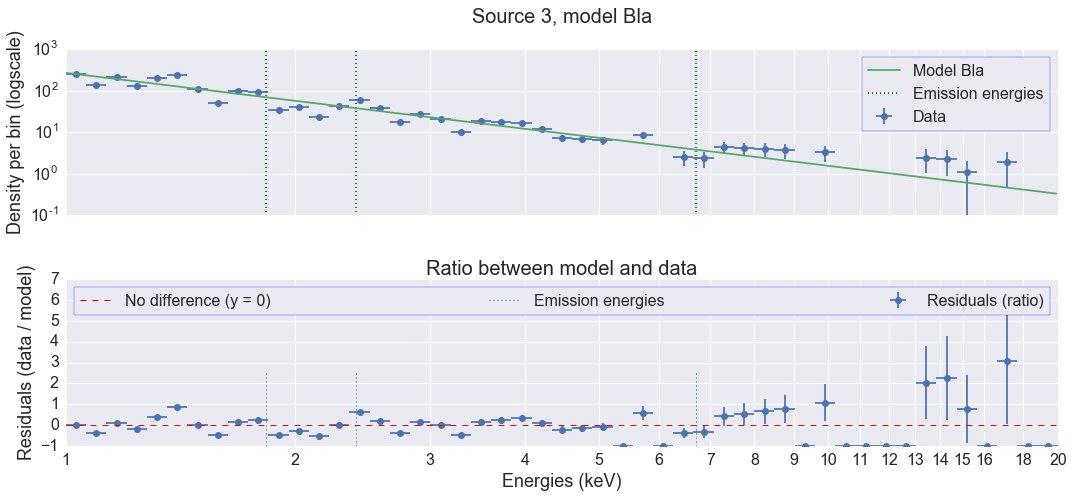

In [2182]:
## Current values:
parameters = ['N0', 'gamma', 'Eline', 'Nlc']
print 'Model = Blazar'
for i in range(len(results3_p[4][0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results3_p[4][0][i], results3_p[4][1][i])
    
print "Maximum log-likelihood = %.2f" % (-1 * results3_p[4][2])

plotfunc(source3_p[0], source3_p[1]/(2*source3_p[3]), source3_p[3], source3_p[2], 3, 'Blap', results3_p)

### Source 4.

Model = Bla
N0 = 278.7241 +/- 6.1472
gamma1 = 2.3930 +/- 0.1015
Maximum log-likelihood = -81.94


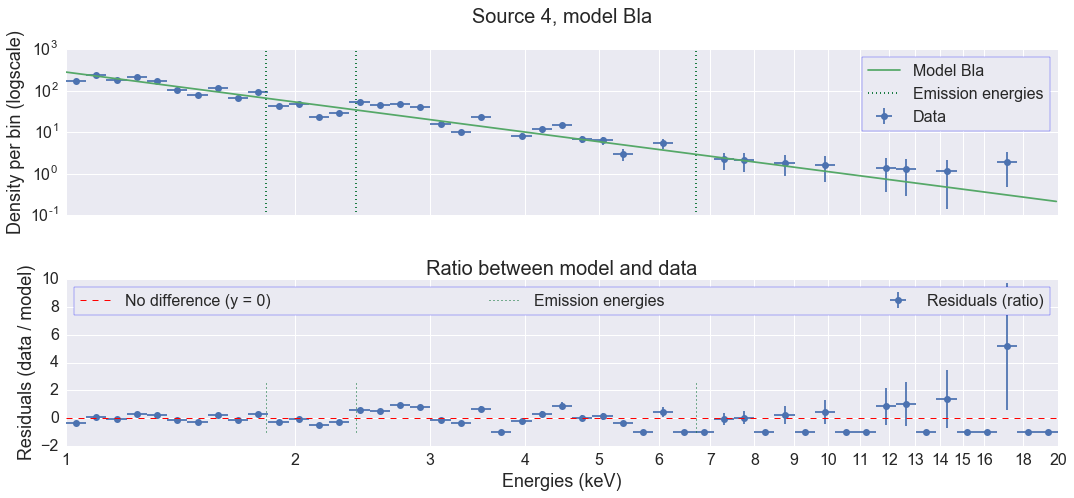

In [2161]:
print 'Model = %s' % models[4]
parameters = ['N0', 'gamma1']
for i in range(len(results4_p[4][0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results4_p[4][0][i], results4_p[4][1][i])
    
print "Maximum log-likelihood = %.2f" % (-1 * results4_p[4][2])

plotfunc(source4_p[0], source4_p[1]/(2*source4_p[3]), source4_p[3], source4_p[2], 4, 'Blap', results4_p)

### Source 5.

This source is (based on the results, regarding source 5, shown above) fitted with an Seyfert model with the appropriate bounds. Seyfert spectra may show an emission line at ~6.4 keV. This is found at a 2-$\sigma$ confidence level and therefor not significant. A second emission line appeared to be present at ~4 keV and a line_flux > 0 around this energy could be true, but no significant evidence is found.

Model = Seyfert
N0 = 936.1163 +/- 56.2001
gamma = 1.8751 +/- 0.0510
Chi-squared = 62.69, with 43 dof
GOF = 0.0265


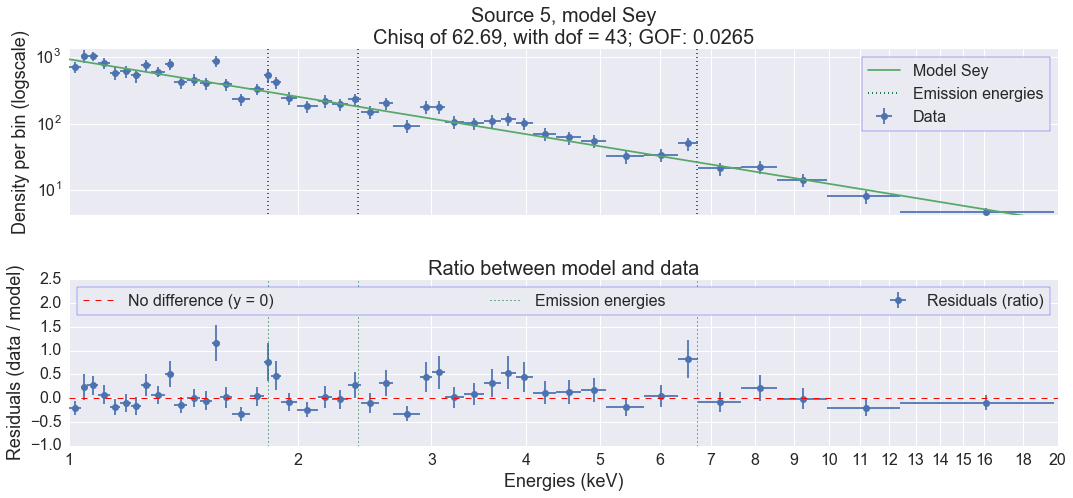


Source 5
N0 = 938.9727 +/- 55.9788
gamma = 1.8855 +/- 0.0522
Eline = 6.3839 +/- 0.2006
Nlc = 13.9626 +/- 18.5161
Chi-squared = 58.45, with 41 dof
GOF = 0.0378


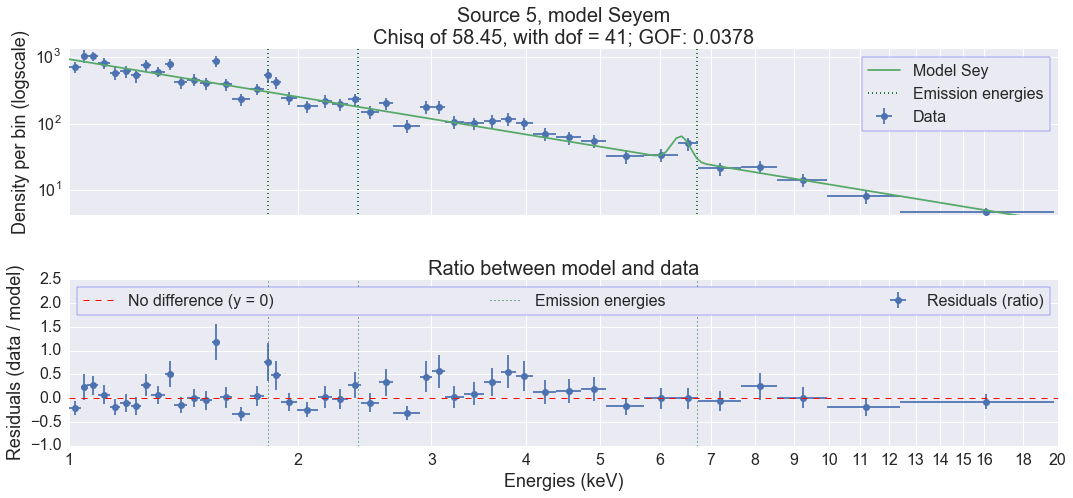

In [2162]:
## Current values:
parameters = ['N0', 'gamma', 'Eline', 'Nlc']
print 'Model = Seyfert'
for i in range(len(results5[5][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results5[5][0][i], results5[5][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results5[5][2], results5[5][3])
print 'GOF = %.4f' % (results5[5][4])

plotfunc(source5[0], source5[1], source5[3], source5[2], 5, 'Sey', results5)    

# # Calculate values with emission line
Seybounds_em = ([-np.inf, 1.7, 6, 1], [np.inf, 2.2, 7, 100])
em_results5 = run_models(my_modelCont_em, [1, 2, 6.4, 20], Seybounds_em, source5, 5, '0')


# Values with emission lines
for i in range(len(em_results5[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em_results5[0][i], em_results5[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em_results5[2], em_results5[3])
print 'GOF = %.4f' % (em_results5[4])

plotfunc(source5[0], source5[1], source5[3], source5[2], 5, 'Sey_em', em_results5)

dchisq = results5[5][2] - em_results5[2]

In [2163]:
print 'Delta chi-squared = %.2f' % dchisq

chi2 = ss.chi2(1)
pval = chi2.sf(dchisq)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval),1)
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level and is therefor not significant" % (pvalcorr, (sigmalevel))

Delta chi-squared = 4.24
p-value for our delta-chi-squared: 0.03948
p-value corrected for number of trials: 0.03948, which corresponds to a 2-sigma confidence level and is therefor not significant



Source 5
N0 = 936.1592 +/- 55.0294
gamma = 1.8953 +/- 0.0522
Eline = 6.3726 +/- 0.1499
Nlc = 15.4008 +/- 16.7236
Eline2 = 3.8397 +/- 0.0735
Nlc2 = 16.5954 +/- 8.3654
Chi-squared = 53.09, with 39 dof
GOF = 0.0657


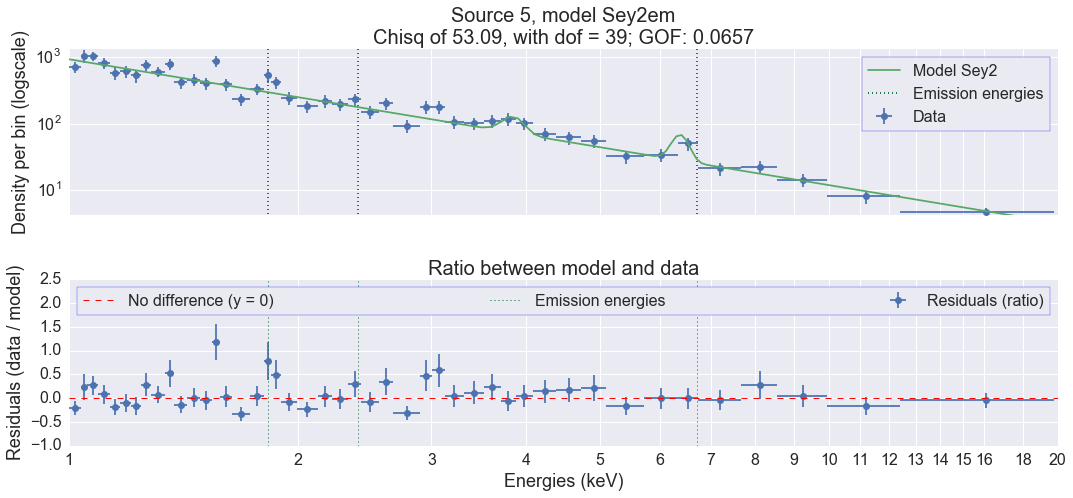

In [2164]:
parameters = ['N0', 'gamma', 'Eline', 'Nlc', 'Eline2', 'Nlc2']

# # Calculate values with another emission line
Seybounds2_em = ([-np.inf, 1.7, 6, 1, 3, 0], [np.inf, 2.2, 7, 100, 4.5, 300])
em2_results5 = run_models(my_modelCont2_em, [1, 2, 6.4, 20, 3.8, 100], Seybounds2_em, source5, 5, '0')


# Values with emission lines
for i in range(len(em2_results5[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em2_results5[0][i], em2_results5[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em2_results5[2], em2_results5[3])
print 'GOF = %.4f' % (em2_results5[4])

plotfunc(source5[0], source5[1], source5[3], source5[2], 5, 'Sey2_em', em2_results5)

dchisq2 = em_results5[2] - em2_results5[2]


In [2165]:
print 'Delta chi-squared = %.2f' % dchisq2

chi2 = ss.chi2(1)
pval = chi2.sf(dchisq2)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval), len(source5[0]))
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level and is therefor not significant" % (pvalcorr, (sigmalevel))

Delta chi-squared = 5.36
p-value for our delta-chi-squared: 0.02061
p-value corrected for number of trials: 0.6082, which corresponds to a 0-sigma confidence level and is therefor not significant


### Source 6.

Model = SNR
N0 = 1500.8191 +/- 95.7871
gamma = 2.3877 +/- 0.0703
Chi-squared = 95.24, with 48 dof
GOF = 5.856e-05


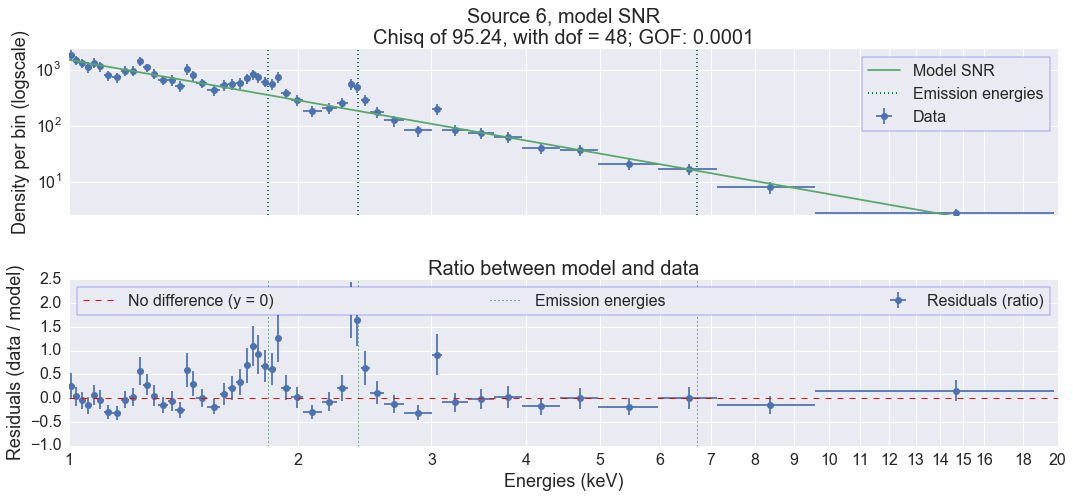



Values after adding emission line:

Source 6
Model = SNR_em
N0 = 1422.4695 +/- 82.1858
gamma = 2.3762 +/- 0.0616
Eline = 1.7811 +/- 0.0223
Nlc = 78.2228 +/- 16.9034
Chi-squared = 64.91, with 46 dof
GOF = 0.03445


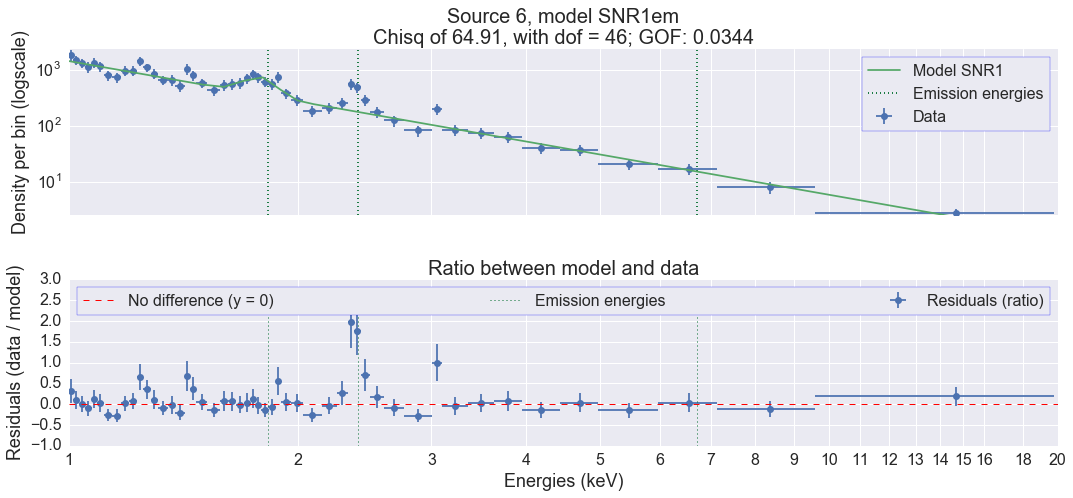

In [2166]:
## Current values:
parameters = ['N0', 'gamma', 'Eline', 'Nlc', 'Eline2', 'Nlc2', 'Eline3', 'Nlc3']
print 'Model = %s' % models[2]
for i in range(len(results6[2][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results6[2][0][i], results6[2][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results6[2][2], results6[2][3])
print 'GOF = %.4g' % (results6[2][4])

plotfunc(source6[0], source6[1], source6[3], source6[2], 6, 'SNR', results6)


print "\n\nValues after adding emission line:"
# Calculate values with emission line
# SNRbounds1_em[0][len(SNRbounds1_em[0]) - 1] = 1.7
# SNRbounds1_em[1][len(SNRbounds1_em[0]) - 1] = 2.
SNRbounds1_em[0][len(SNRbounds1_em[0]) - 2] = 1.7
SNRbounds1_em[1][len(SNRbounds1_em[0]) - 2] = 2.
SNRbounds1_em[0][0] = 900
SNRbounds1_em[1][0] = 1550
SNRbounds1_em[0][1] = 2.2
SNRbounds1_em[1][1] = 2.5


em1_results6 = run_models(my_modelSNR1_em, [1500, 2.4, 1.8, 100], SNRbounds1_em, source6, 6, '0')

# Values with emission lines
print 'Model = %s' % models[2]+'_em'
for i in range(len(em1_results6[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em1_results6[0][i], em1_results6[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em1_results6[2], em1_results6[3])
print 'GOF = %.4g' % (em1_results6[4])

plotfunc(source6[0], source6[1], source6[3], source6[2], 6, 'SNR1_em', em1_results6)

dchisq = results6[2][2] - em1_results6[2]


Check if model improved significantly with this 1 additional free parameter

In [2167]:
print 'Delta chi-squared = %.2f' % dchisq

chi2 = ss.chi2(1)
xchi = np.arange(-0.1, 10, 0.1)
pval = chi2.sf(dchisq)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval),1)
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level" % (pvalcorr, sigmalevel)

Delta chi-squared = 30.34
p-value for our delta-chi-squared: 3.633e-08
p-value corrected for number of trials: 3.633e-08, which corresponds to a 5-sigma confidence level


Values after adding another emission line:

Source 6
N0 = 1391.7238 +/- 71.1791
gamma = 2.3920 +/- 0.0553
Eline = 1.7808 +/- 0.0183
Nlc = 81.5547 +/- 14.4833
Eline2 = 2.3890 +/- 0.0243
Nlc2 = 49.4738 +/- 11.4115
Chi-squared = 45.44, with 44 dof
GOF = 0.4118


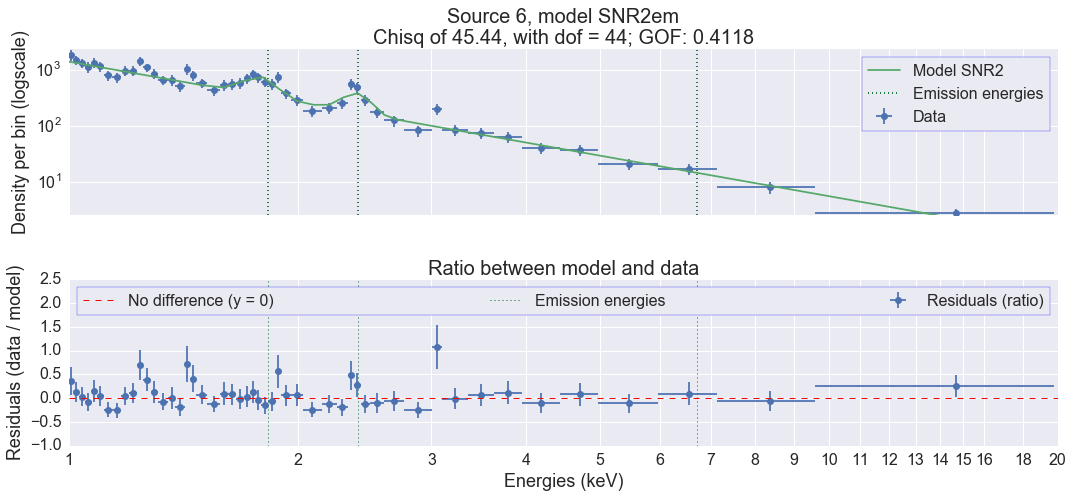

In [2168]:
print "Values after adding another emission line:"
# Calculate values with emission line

SNRbounds2_em = ([1300, 2.1, 1.7, 70, 2.2, 10], [1500, 2.5, 1.9, 100, 2.6, 150])

em2_results6 = run_models(my_modelSNR2_em, [1444, 2.37, 1.77, 77, 2.4, 70], SNRbounds2_em, source6, 6, '0')
dchisq1 = em1_results6[2] - em2_results6[2]

# Values with emission lines
for i in range(len(em2_results6[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em2_results6[0][i], em2_results6[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em2_results6[2], em2_results6[3])
print 'GOF = %.4g' % (em2_results6[4])

plotfunc(source6[0], source6[1], source6[3], source6[2], 6, 'SNR2_em', em2_results6)

In [2169]:
print 'Delta-chi-squared = %.2f' % dchisq1

chi2 = ss.chi2(1)
xchi = np.arange(-0.1, 10, 0.1)
pval = chi2.sf(dchisq)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval),1)
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level" % (pvalcorr, sigmalevel)

Delta-chi-squared = 19.47
p-value for our delta-chi-squared: 3.633e-08
p-value corrected for number of trials: 3.633e-08, which corresponds to a 5-sigma confidence level


Values after adding a third emission line:

Source 6
N0 = 1383.5343 +/- 76.1512
gamma = 2.4077 +/- 0.0626
Eline = 1.7807 +/- 0.0190
Nlc = 83.1263 +/- 15.3258
Eline2 = 2.3877 +/- 0.0181
Nlc2 = 70.0000 +/- 12.0919
Eline3 = 6.8255 +/- 0.1839
Nlc3 = 4.3522 +/- 0.0036
Chi-squared = 48.53, with 42 dof
GOF = 0.2265

This last emission line worsens the fit. We can conclude that a model that has a third emission line between 6.5 and 6.9 keV is not consistent with this data set


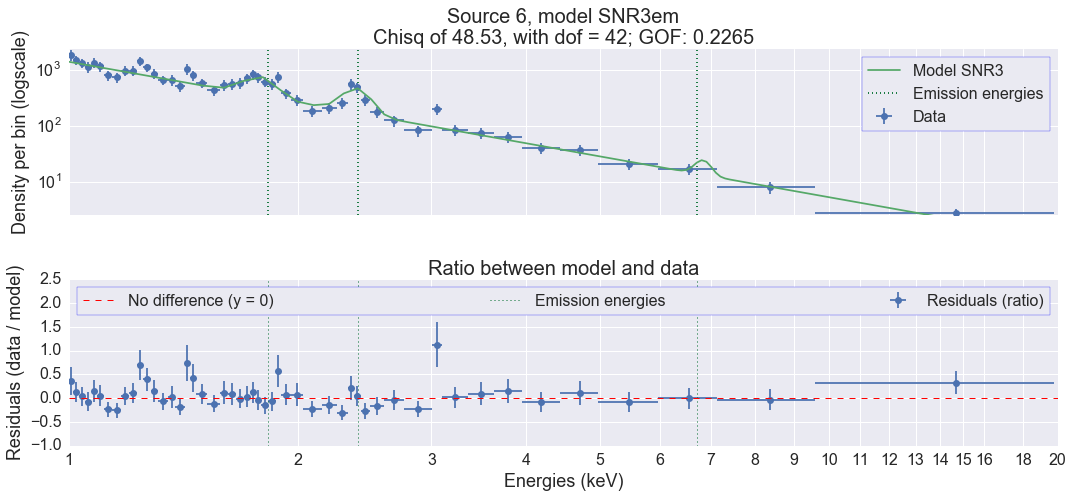

In [2170]:
print "Values after adding a third emission line:"
# Calculate values with emission line

SNRbounds3_em = ([1300, 2.1, 1.7, 70, 2.2, 70, 6.5, 1], [1500, 2.5, 1.9, 100, 2.6, 150, 6.9, 50])

em3_results6 = run_models(my_modelSNR3_em, [1444, 2.37, 1.77, 77, 2.4, 100, 6.7, 10], SNRbounds3_em, source6, 6, '0')
dchisq2 = em2_results6[2] - em3_results6[2]

# Values with third emission lines
for i in range(len(em3_results6[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em3_results6[0][i], em3_results6[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em3_results6[2], em3_results6[3])
print 'GOF = %.4g' % (em3_results6[4])
print '\nThis last emission line worsens the fit. We can conclude that a model that has a third emission line between 6.5 and 6.9 keV is not consistent with this data set'

plotfunc(source6[0], source6[1], source6[3], source6[2], 6, 'SNR3_em', em3_results6)

Values after adding a third emission line add different location:

Source 6
N0 = 1377.1446 +/- 74.8664
gamma = 2.4124 +/- 0.0608
Eline = 1.7806 +/- 0.0185
Nlc = 83.8895 +/- 15.1133
Eline2 = 2.3877 +/- 0.0179
Nlc2 = 70.0000 +/- 11.9182
Eline3 = 3.0768 +/- 0.0780
Nlc3 = 11.5426 +/- 9.7621
Chi-squared = 47.08, with 42 dof
GOF = 0.2723

This last emission line worsens the fit. We can conclude that this data set is not consistent with a model that has a third emission line between 3.0 and 3.2 keV


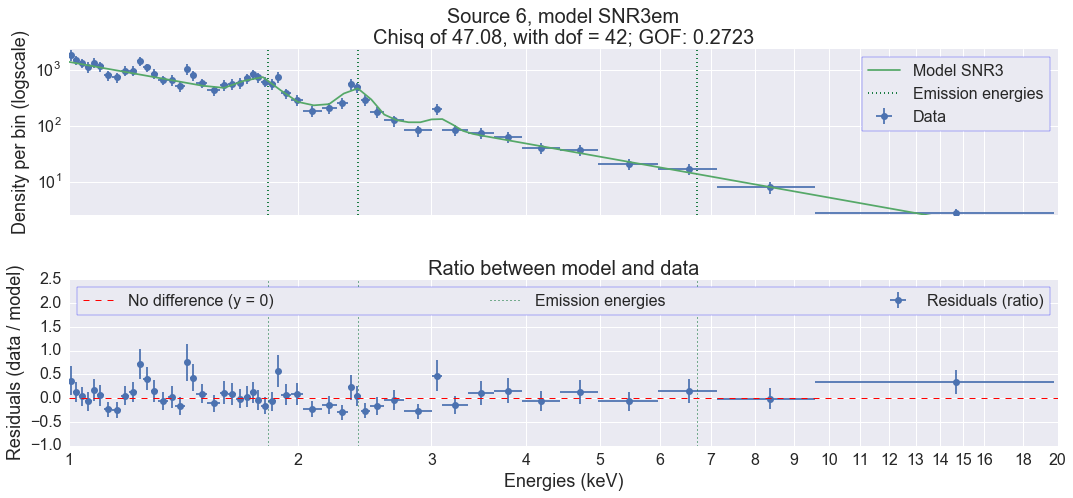

In [2171]:
print "Values after adding a third emission line add different location:"
# Calculate values with emission line

SNRbounds3_em = ([1300, 2.1, 1.7, 70, 2.2, 70, 3., 1], [1500, 2.5, 1.9, 100, 2.6, 150, 3.2, 300])

em4_results6 = run_models(my_modelSNR3_em, [1444, 2.37, 1.77, 77, 2.4, 100, 3.1, 10], SNRbounds3_em, source6, 6, '0')
dchisq2 = em2_results6[2] - em4_results6[2]

# Values with third emission lines
for i in range(len(em4_results6[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em4_results6[0][i], em4_results6[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em4_results6[2], em4_results6[3])
print 'GOF = %.4g' % (em4_results6[4])
print '\nThis last emission line worsens the fit. We can conclude that this data set is not consistent with a model that has a third emission line between 3.0 and 3.2 keV'

plotfunc(source6[0], source6[1], source6[3], source6[2], 6, 'SNR3_em', em4_results6)

### Source 7.

Current values and model

Model = SNR
N0 = 212.3672 +/- 59.9233
gamma = 2.3000 +/- 0.4122
Chi-squared = 38.26, with 7 dof
GOF = 2.705e-06


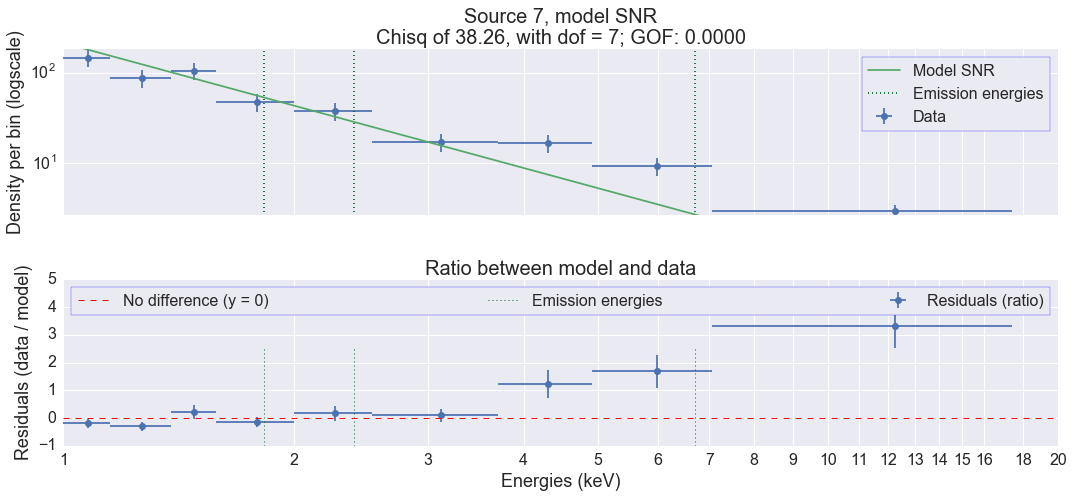

After freeing gamma

Source 7
Model = Bla
N0 = 133.377577345 +/- 15.9748548065
gamma = 1.5483 +/- 0.0909
Minimum Chi-squared = 6.30937112707 for 7 d.o.f.
The goodness of fit is: 0.5041


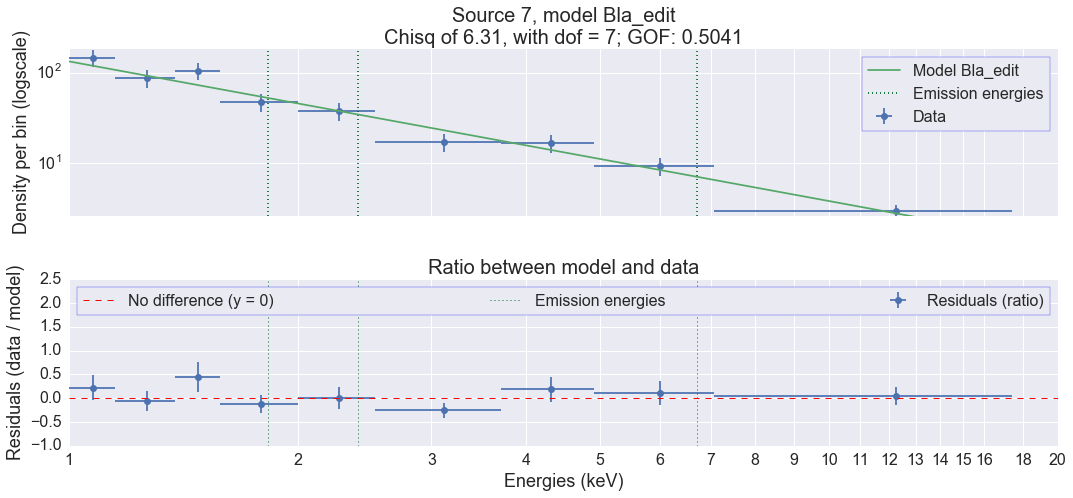

In [2172]:
## Current values:
print "Current values and model\n"
parameters = ['N0', 'gamma', 'Eline', 'Nlc']
print 'Model = %s' % models[2]
for i in range(len(results7[2][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results7[2][0][i], results7[2][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results7[2][2], results7[2][3])
print 'GOF = %.4g' % (results7[2][4])

plotfunc(source7[0], source7[1], source7[3], source7[2], 7, 'SNR', results7)

print "After freeing gamma"
Blabounds = ([100, 1.5], [300, 2.1])
edit_results7 = run_models(my_modelCont, [170, 2.0], Blabounds, source7, 7, 'Bla')

plotfunc(source7[0], source7[1], source7[3], source7[2], 7, 'Bla_edit', edit_results7)


# print "Adding emission line"
# Blabounds_em = ([100, 1.8, 7, 50], [300, 2.3, 8, 400])
# em_results7 = run_models(my_modelCont_em, [10869, 2.08, 7.1, 100], Blabounds_em, source7, 7, '0')

# # Values with absorption line
# for i in range(len(abs1_results8[0])):
#     print '%s = %.4f +/- %.4f' % (parameters[i], abs1_results8[0][i], abs1_results8[1][i])
    
# print 'Chi-squared = %.2f, with %i dof' % (abs1_results8[2], abs1_results8[3])
# print 'GOF = %.4g' % (abs1_results8[4])

# plotfunc(source8[0], source8[1], source8[3], source8[2], 8, 'Sey_em', abs1_results8)

### Source 8.

Current values and model

Model = Sey
N0 = 11175.5157 +/- 214.7888
gamma = 2.0853 +/- 0.0183
Chi-squared = 131.70, with 86 dof
GOF = 0.001118

Source 8
N0 = 11073.6724 +/- 183.4897
gamma = 2.0631 +/- 0.0158
Eline = 7.1868 +/- 0.0349
Nlc = -48.4107 +/- 9.1326
Chi-squared = 95.32, with 84 dof
GOF = 0.1873


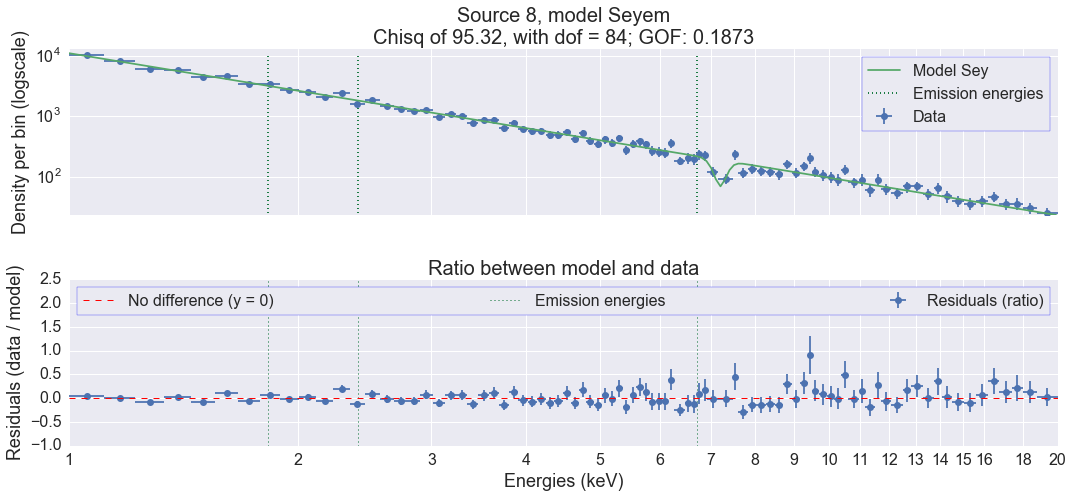

In [2173]:
## Current values:
print "Current values and model\n"
parameters = ['N0', 'gamma', 'Eline', 'Nlc']
print 'Model = %s' % models[5]
for i in range(len(results8[5][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results8[5][0][i], results8[5][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results8[5][2], results8[5][3])
print 'GOF = %.4g' % (results8[5][4])

#plotfunc(source8[0], source8[1], source8[3], source8[2], 8, 'Sey', results8)    


Seybounds_em = ([9000, 1.8, 7, -300], [12000, 2.3, 8, -10])
abs1_results8 = run_models(my_modelCont_em, [10869, 2.08, 7.1, -100], Seybounds_em, source8, 8, '0')

# Values with absorption line
for i in range(len(abs1_results8[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], abs1_results8[0][i], abs1_results8[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (abs1_results8[2], abs1_results8[3])
print 'GOF = %.4g' % (abs1_results8[4])

plotfunc(source8[0], source8[1], source8[3], source8[2], 8, 'Sey_em', abs1_results8)

dchisq = results8[5][2] - abs1_results8[2]



In [2174]:
print 'Delta chi-squared = %.2f' % dchisq

chi2 = ss.chi2(1)
xchi = np.arange(-0.1, 10, 0.1)
pval = chi2.sf(dchisq)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval),len(source8[0]))
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level" % (pvalcorr, sigmalevel)

Delta chi-squared = 36.38
p-value for our delta-chi-squared: 1.627e-09
p-value corrected for number of trials: 1.432e-07, which corresponds to a 5-sigma confidence level


### Source 9.

This source is (based on the results, regarding source 9, shown above) fitted with an XRB model with the appropriate bounds. Three models, all with different bounds on an emission/absorption line, are fitted to the data, but none of them are found to be better in the end. The ones with an emission line at 1.3-2 keV and 2.0-2.5 keV are overfitting the data. The model with an absoprtion line at 3.4-3.75 keV is not an improvement in comparison with the model without an emission line.

Current values and model

Model = XRB
N0 = 142.5588 +/- 10.2592
kb*T = 0.8824 +/- 0.0173
Maximum log-likelihood = -83.49


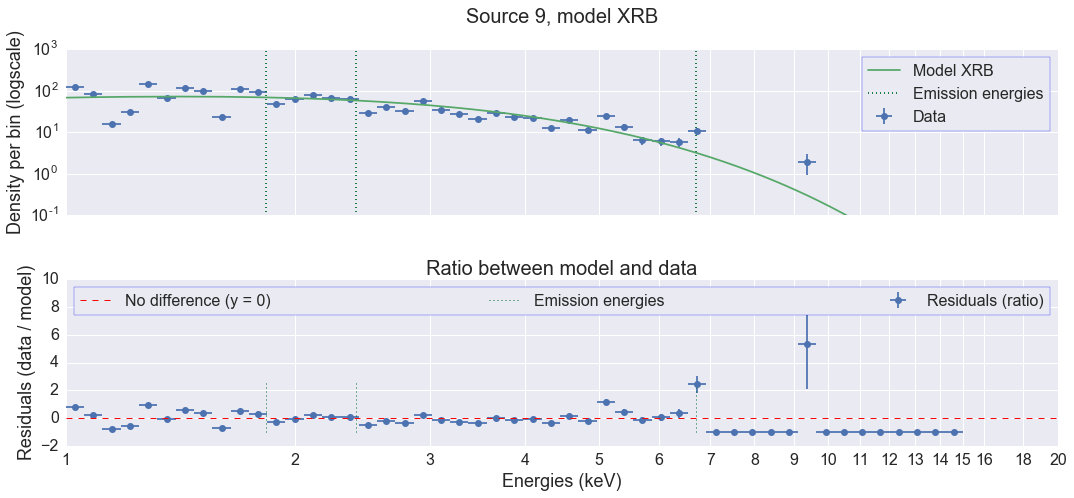

Results model including emission line

Source 9
Model = XRBp
Parameters =  [ 156.81533891    0.84955313    5.17602189    6.10249344]
Errors are:  [ 13.12633259   0.03946481   0.15895522   4.46025647]
Maximum log-likelihood: -81.3499
... which is not a significant improvement.


In [2175]:
## Current values:
print "Current values and model\n"
parameters = ['N0', 'kb*T', 'Eline', 'Nlc']
print 'Model = %s' % models[3]
for i in range(len(results9_p[3][0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results9_p[3][0][i], results9_p[3][1][i])
    
print 'Maximum log-likelihood = %.2f' % (-1 * results9_p[3][2])

plotfunc(source9_p[0], source9_p[1] / (source9_p[3] * 2), source9_p[3], source9_p[2], 9, 'XRBp', results9_p)

print "Results model including emission line"
XRBbounds_p_em = [(-np.inf, np.inf), (0.8, 1.4), (4.8, 5.5), (0, 100)]
em_results9_p = run_models(my_modelXRB_em, [105., 0.96, 5.0, 30], XRBbounds_p_em, source9_p, 9, 'XRBp')
print '... which is not a significant improvement.'

### Source 10.

Current values and model (Seyfert)

Model = Sey
N0 = 970.7213 +/- 50.7477
gamma1 = 1.9806 +/- 0.0466
Chi-squared = 41.44, with 38 dof
GOF = 0.3229


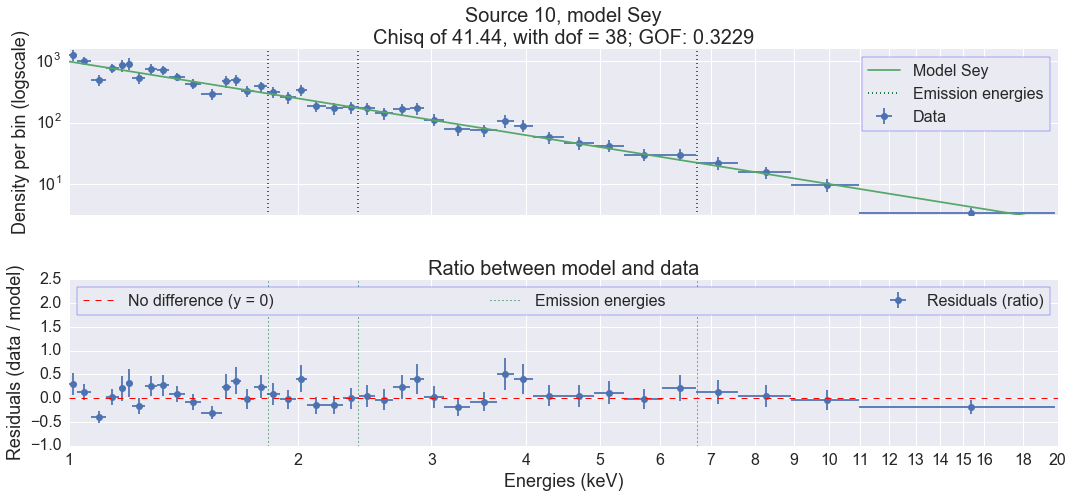

Current values and model (Blazar)

Model = Bla
N0 = 986.5550 +/- 51.4264
gamma1 = 2.0000 +/- 0.0475
Chi-squared = 41.64, with 38 dof
GOF = 0.3153
With emission line at ~3.7 keV:

Source 10
N0 = 968.3614 +/- 49.7740
gamma1 = 1.9896 +/- 0.0466
Eline = 3.8404 +/- 0.0645
Nlc = 13.9277 +/- 7.0604
Chi-squared = 37.37, with 36 dof
GOF = 0.4059


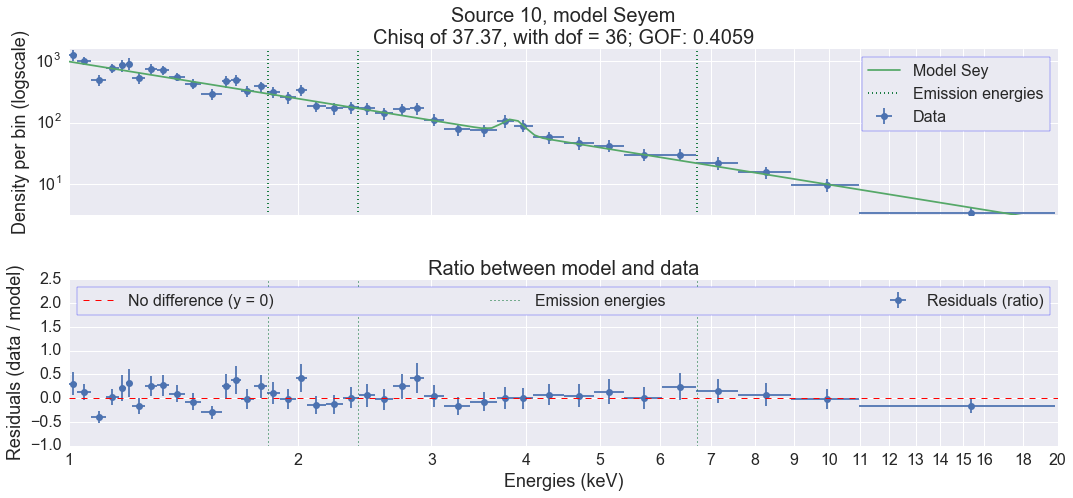

With emission line at ~6.2 keV:

Source 10
N0 = 972.3527 +/- 51.9649
gamma1 = 1.9865 +/- 0.0492
Eline = 6.3819 +/- 999.3775
Nlc = 2.1950 +/- 1908.8475
Chi-squared = 40.76, with 36 dof
GOF = 0.2691


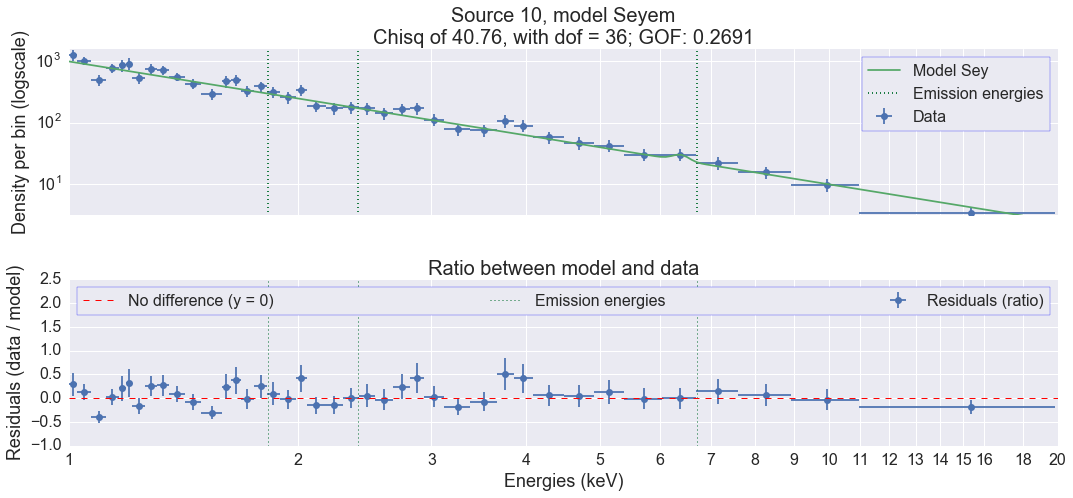

In [2176]:
## Current values:
parameters = ['N0', 'gamma1', 'Eline', 'Nlc']
print "Current values and model (Seyfert)\n"
print 'Model = %s' % models[5]
for i in range(len(results10[5][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results10[5][0][i], results10[5][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results10[5][2], results10[5][3])
print 'GOF = %.4g' % (results10[5][4])

plotfunc(source10[0], source10[1], source10[3], source10[2], 10, 'Sey', results10)    


## Current values:
parameters = ['N0', 'gamma1', 'Eline', 'Nlc']
print "Current values and model (Blazar)\n"
print 'Model = %s' % models[4]
for i in range(len(results10[4][1])):
    print '%s = %.4f +/- %.4f' % (parameters[i], results10[4][0][i], results10[4][1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (results10[4][2], results10[4][3])
print 'GOF = %.4g' % (results10[4][4])


# # Calculate values with emission line
Seybounds10_em = ([-np.inf, 1.7, 3.5, 1], [np.inf, 2.2, 4, 100])
print 'With emission line at ~3.7 keV:'
em_results10 = run_models(my_modelCont_em, [1, 2, 3.8, 20], Seybounds10_em, source10, 10, '0')


# Values with emission lines
for i in range(len(em_results10[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em_results10[0][i], em_results10[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em_results10[2], em_results10[3])
print 'GOF = %.4f' % (em_results10[4])

plotfunc(source10[0], source10[1], source10[3], source10[2], 10, 'Sey_em', em_results10)

dchisq = results10[5][2] - em_results10[2]


# # Calculate values with emission line
Seybounds10_em2 = ([-np.inf, 1.7, 6., 1.], [np.inf, 2.2, 7., 100.])
print 'With emission line at ~6.2 keV:'
em2_results10 = run_models(my_modelCont_em, [1, 2, 6.2, 20], Seybounds10_em2, source10, 10, '0')


# Values with another emission lines
for i in range(len(em2_results10[0])):
    print '%s = %.4f +/- %.4f' % (parameters[i], em2_results10[0][i], em2_results10[1][i])
    
print 'Chi-squared = %.2f, with %i dof' % (em2_results10[2], em2_results10[3])
print 'GOF = %.4f' % (em2_results10[4])

plotfunc(source10[0], source10[1], source10[3], source10[2], 10, 'Sey_em', em2_results10)

dchisq2 = results10[5][2] - em2_results10[2]

In [2177]:
print 'Delta chi-squared = %.2f' % dchisq

chi2 = ss.chi2(1)
xchi = np.arange(-0.1, 10, 0.1)
pval = chi2.sf(dchisq)
print "p-value for our delta-chi-squared: %.4g" % pval

pvalcorr = 1.0-np.power((1.0-pval),1)
sigmalevel = np.floor(p_to_sigmas(pvalcorr))
print "p-value corrected for number of trials: %.4g, which corresponds to a %i-sigma confidence level" % (pvalcorr, sigmalevel)

Delta chi-squared = 4.07
p-value for our delta-chi-squared: 0.04361
p-value corrected for number of trials: 0.04361, which corresponds to a 2-sigma confidence level
